In [316]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [359]:
df = pd.read_csv('input.csv', delimiter=',')
df['duration'] = df['report.date'] - df['production.date']


In [318]:
# Плотность распределения для harpy.co
comp = 'westeros.inc'
steel = df[df['supplier'] == comp].produced.sum()
prob = []
for interval in range(1, 8):
    query = df[(df['supplier'] ==  comp) & (df.duration == interval)]
    print('== %s month' % interval)
    v = query.defects.sum() / steel
    prob.append(1 - v)
print(prob)
expected_life = sum(m * p for m, p in zip(range(1, 10), prob))
print(expected_life)

== 1 month
== 2 month
== 3 month
== 4 month
== 5 month
== 6 month
== 7 month
[0.91516205533596839, 0.93473517786561267, 0.95241106719367585, 0.96622924901185769, 0.97890909090909095, 0.9911146245059288, 1.0]
27.3480158103


In [320]:
# Плотность распределения для Westeros Inc.
steel = df[(df['production.date'] < 4) & (df['supplier'] == 'westeros.inc')].produced.sum()
for interval in range(1, 8):
    query = df[(df['supplier'] == 'westeros.inc') & (df.duration == interval) & (df['report.date'] < 5)]
    print('== %s month' % interval)
    print(query.defects.sum() / steel)

== 1 month
0.0856151419558
== 2 month
0.052429022082
== 3 month
0.0254258675079
== 4 month
0.0
== 5 month
0.0
== 6 month
0.0
== 7 month
0.0


In [428]:
# Доля дефектных мечей по месяцам
res = {'harpy.co': [], 'westeros.inc': []}
for comp in ['harpy.co', 'westeros.inc']:
    comp_df = df[df.supplier == comp]
    for n in range(2, 8):
        query = comp_df[comp_df['report.date'] < n]
        fr = comp_df[comp_df['report.date'] == n].defects.sum()
        den = query.produced.sum() - query.defects.sum()
        res[comp].append(fr / den)
        print(fr / den)
    print('---------')
harpy_co, west_inc = res['harpy.co'], res['westeros.inc']
avg = sum(west_inc)/len(west_inc)
for i in range(100):
    harpy_co.append(0.09)
    west_inc.append(avg)



# d = (np.array([harpy_co, west_inc])).transpose()

# ddf = pd.DataFrame(data=d)
# rvals = [str(i) for i in range(1, 7)]
# ddf.columns = ['harpy.co', 'westeros.inc']
# ax = ddf.plot(kind='barh', stacked=False)
# ax.set_yticklabels(rvals)

# plt.title('Probability of breaking on month')
# plt.show()

0.0240091463415
0.0258238581615
0.0261838077249
0.0583205654129
0.0731396114587
0.0837683141942
---------
0.0850378787879
0.0843313867168
0.0886658876899
0.0848252804142
0.0861293514437
0.0856885618101
---------


In [457]:
M = 72

In [458]:
harpy = [sum(harpy_co[:i]) for i in range(M)]

In [459]:
wes = [sum(west_inc[:i]) for i in range(M)]
print(wes)


[0, 0.085037878787878787, 0.16936926550469555, 0.25803515319457115, 0.34286043360872132, 0.42898978505245611, 0.51467834686252423, 0.6004580713396116, 0.68623779581669897, 0.77201752029378634, 0.85779724477087371, 0.94357696924796108, 1.0293566937250485, 1.1151364182021357, 1.200916142679223, 1.2866958671563102, 1.3724755916333975, 1.4582553161104848, 1.544035040587572, 1.6298147650646593, 1.7155944895417465, 1.8013742140188338, 1.8871539384959211, 1.9729336629730083, 2.0587133874500956, 2.1444931119271828, 2.2302728364042701, 2.3160525608813574, 2.4018322853584446, 2.4876120098355319, 2.5733917343126191, 2.6591714587897064, 2.7449511832667937, 2.8307309077438809, 2.9165106322209682, 3.0022903566980554, 3.0880700811751427, 3.17384980565223, 3.2596295301293172, 3.3454092546064045, 3.4311889790834917, 3.516968703560579, 3.6027484280376663, 3.6885281525147535, 3.7743078769918408, 3.860087601468928, 3.9458673259460153, 4.0316470504231026, 4.1174267749001903, 4.203206499377278, 4.2889862238

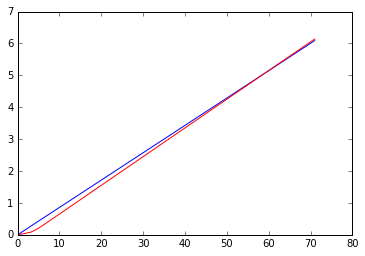

In [460]:
import matplotlib.pyplot as plt
plt.plot(range(len(wes)), wes, color='blue')
plt.plot(range(len(wes)), harpy, color='red')
plt.show()

[1.0245997657165171, 1.0517602738482703, 1.0800398290677877, 1.1469294001746997, 1.2374349085947201, 1.3505698697883359, 1.4841427140531163, 1.6309260593990289, 1.7922264389000317, 1.969479603186848, 2.1642633002053273, 2.3783113189069534, 2.6135289218757727, 2.8720098042590907, 3.1560547299550445, 3.4681920109396094, 3.8112000120215481, 4.1881318813423611, 4.6023427267498471, 5.0575194799448875, 5.5577137142251507, 6.107377707939726, 6.7114040746590389, 7.3751693128121296, 8.1045816624309115, 8.9061336949790224, 9.7869601043725538, 10.754901213596211, 11.818572762193638, 12.987442595817186, 14.271914940458446, 15.683423011492799, 17.234530781860219, 18.939044815231007, 20.812137159594513, 22.870480395158804, 25.132396038636049, 27.618017624874774, 30.349469917444807, 33.351065843345943, 36.649522904775758, 40.274200994259076, 44.257363729955024, 48.634465637313212, 53.444467733311221, 58.730184322320014, 64.538664090461552, 70.921608890617094, 77.935833945733052, 85.643773566739625, 9

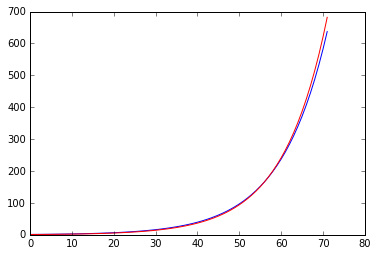

[1.09294141999586, 1.1935993045312046, 1.3097274516648689, 1.4311228486048746, 1.5660015461332142, 1.7127660015207042, 1.8734719053797424, 2.0492565692750144, 2.2415348074651784, 2.4518541838104313, 2.6819074674405226, 2.9335462571167921, 3.2087958839447879, 3.5098717123829171, 3.8391969707468503, 4.1994222547196509, 4.5934468608428967, 5.0244421216927755, 5.4958769305558359, 6.0115456610413966, 6.5755987063434276, 7.1925758839491261, 7.867442974654157, 8.605631689971176, 9.4130833896119359, 10.296296900905935, 11.262380825033327, 12.319110751062164, 13.4749918382809, 14.739327270524075, 16.122293133450277, 17.635020317427003, 19.289684105223092, 21.099602165561077, 23.07934174123692, 25.244836894517658, 27.613516753474102, 30.204445791447597, 33.038477268699125, 36.138421071225849, 39.52922729760671, 43.238187071487687, 47.295152195958956, 51.732775417726586, 56.586773234860317, 61.896213363342888, 67.703829176113715, 74.056363645390277, 81.004945556509099, 88.605501021267713, 96.9192

In [462]:
den = 1
ans = []
for m in range(M):
    den *= 1 - harpy_co[m]
    ans.append(1 / den)

print(ans)
harpy = ans

ans = []
den = 1
for m in range(M):
    den *= 1 - west_inc[m]
    ans.append(1 / den)
import matplotlib.pyplot as plt
plt.plot(range(len(wes)), ans)
plt.plot(harpy, color='red')
#plt.ylabel('some numbers')

plt.show()
print(ans)